# DBN Construction & Binary Alpha/Digits TEST

In [2]:
import sys
sys.path.insert(0, '../')  # Notebook is in the 'notebooks' directory
# Import the RBM class from the principal_RBM_alpha.py file
from src.rbm import init_RBM
from src.rbm import entree_sortie_rbm
from src.rbm import sortie_entree_rbm
from src.rbm import train_RBM
from src.rbm import generer_image_RBM
# Import the RBM class from the RBM_class.py file
from src.rbm.RBM_class import RBM
import numpy as np
import matplotlib.pyplot as plt
# Import the function to read the alpha_digit dataset
from src.data_utils import lire_alpha_digit

### init_DBN:

In [3]:
def init_DBN(sizes):
    """
    Initialize a Deep Belief Network (DBN) with the given sizes
    
    param:
    sizes: a list containing the number of visible units and hidden units for each RBM in the DBN
    
    Returns:
    DBN: a dictionary containing the weights and biases of each RBM in the DBN
    """
    dbn = {'W': [], 'b': [], 'a': []}  # Dictionnaire pour stocker les poids et biais
    
    # Initialisation de chaque RBM dans le DBN
    for i in range(len(sizes) - 1):
        rbm = init_RBM(sizes[i], sizes[i+1])
        W, b, a = rbm['W'], rbm['b'], rbm['a']
        dbn['W'].append(W)
        dbn['b'].append(b)
        dbn['a'].append(a)
    
    return dbn

In [4]:
def train_DBN(X, dbn, epochs=100, learning_rate=0.1, batch_size=128):
    """
    Train a Deep Belief Network (DBN) using the Contrastive Divergence (CD) algorithm
    
    param:
    dbn: a dictionary containing the weights and biases of each RBM in the DBN
    X: a 2D numpy array containing the input data
    n_iter: number of iterations for the training
    batch_size: size of the mini-batches
    learning_rate: learning rate for the training
    
    Returns:
    dbn: a dictionary containing the weights and biases of each RBM in the DBN
    """
    # Initialisation des variables
    n_layers = len(dbn['W'])
    X_train = X.copy()
    
    # Entrainement couche par couche
    for i in range(n_layers):
        print('Training layer', i+1)
        rbm = {'W': dbn['W'][i], 'a': dbn['a'][i], 'b': dbn['b'][i]} # current RBM
        train_RBM(X_train, rbm, epochs, learning_rate, batch_size)
        X_train = np.random.binomial(1, entree_sortie_rbm(rbm, X_train))
        dbn['W'][i] = rbm['W']
        dbn['b'][i] = rbm['b']
        dbn['a'][i] = rbm['a']
    
    return dbn

In [18]:
def generate_image_DBN(dbn, nb_images, x_shape=28, y_shape=28, nb_iterations=100, Plot=False):
    """
    Generates images using a Deep Belief Network (DBN).

    param:
    - dbn (dict): The Deep Belief Network containing the weights and biases.
    - nb_images (int): The number of images to generate.
    - x_shape (int): The width of the generated images (default: 28).
    - y_shape (int): The height of the generated images (default: 28).
    - nb_iterations (int): The number of iterations for generating each image (default: 100).
    - Plot (bool): Whether to plot the generated images (default: False).

    Returns:
    - images (ndarray): An array of generated images with shape (nb_images, x_shape, y_shape).
    """
    rbm = {'W': dbn['W'][-1], 'a': dbn['a'][-1], 'b': dbn['b'][-1]}
    v = generer_image_RBM(rbm, nb_images, x_shape, y_shape, nb_iterations, False)
    
    for i in range(2, len(dbn['W'])+1):
        rbm = {'W': dbn['W'][-i], 'a': dbn['a'][-i], 'b': dbn['b'][-i]}
        v = np.random.binomial(1, sortie_entree_rbm(rbm, v))

    images = v.reshape((nb_images, x_shape, y_shape))
    if Plot:
        # Reshape and Plot generated images
        fig, axes = plt.subplots(1, nb_images, figsize=(10, 2))
        for i in range(nb_images):
            axes[i].imshow(images[i])
            axes[i].axis("off")
        plt.suptitle(f"Number of layers {len(dbn['W'])}")
        plt.show()
    return images

### Test Functions

In [54]:
# Load the data
data_path = '../data/binary_alpha_digits/binaryalphadigs.mat'
X = lire_alpha_digit(data_path, np.array([32,24,17,9]))

In [55]:
n_b, p_b = X.shape
n_b, p_b

(156, 320)

In [56]:
DBN = init_DBN([p_b, 200, 200])
print(DBN['W'][0].shape, DBN['W'][1].shape)

(320, 200) (200, 200)


In [57]:
DBN = train_DBN(X, DBN, epochs=1000, learning_rate=0.1, batch_size=16)

Training layer 1
Epoch 1/1000, Mean Square Error : 0.4803385416666667
Epoch 2/1000, Mean Square Error : 0.41916956018518514
Epoch 3/1000, Mean Square Error : 0.370240162037037
Epoch 4/1000, Mean Square Error : 0.3496310763888889
Epoch 5/1000, Mean Square Error : 0.32826967592592593
Epoch 6/1000, Mean Square Error : 0.31699942129629627
Epoch 7/1000, Mean Square Error : 0.3009259259259259
Epoch 8/1000, Mean Square Error : 0.2860677083333333
Epoch 9/1000, Mean Square Error : 0.2788845486111111
Epoch 10/1000, Mean Square Error : 0.26853298611111115
Epoch 11/1000, Mean Square Error : 0.2604383680555556
Epoch 12/1000, Mean Square Error : 0.2542607060185185
Epoch 13/1000, Mean Square Error : 0.24445891203703699
Epoch 14/1000, Mean Square Error : 0.23526475694444443
Epoch 15/1000, Mean Square Error : 0.2287543402777778
Epoch 16/1000, Mean Square Error : 0.2250434027777778
Epoch 17/1000, Mean Square Error : 0.21540075231481484
Epoch 18/1000, Mean Square Error : 0.21227575231481477
Epoch 19/1000

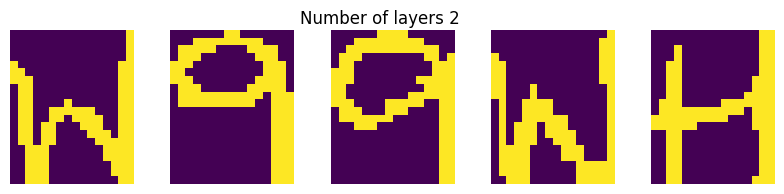

In [58]:
images = generate_image_DBN(DBN, 5, x_shape=20, y_shape=16, nb_iterations=500, Plot=True)

## Class DBN

In [8]:
class DBN:
    def __init__(self, sizes):
        self.rbms = [RBM(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]
    def train(self, X, epochs=100, learning_rate=0.1, batch_size=128):
        # Initializations
        n_layers = len(self.rbms)
        X_train = X.copy()
        # training layer by layer
        for i in range(n_layers):
            print('Training layer', i+1)
            self.rbms[i].train(X_train, epochs, learning_rate, batch_size)
            X_train = np.random.binomial(1, self.rbms[i].entree_sortie(X_train))

    def generate_images(self, nb_images, x_shape=28, y_shape=28, nb_iterations=100, Plot=False):
        """
        Generate images using the Deep Belief Network (DBN).
        """
        v = self.rbms[-1].generate_images(nb_images, x_shape, y_shape, nb_iterations, False)
        for i in range(2, len(self.rbms)+1):
            v = np.random.binomial(1, self.rbms[-i].sortie_entree(v))
        images = v.reshape((nb_images, x_shape, y_shape))

        if Plot:
            # Reshape and Plot generated images
            fig, axes = plt.subplots(1, nb_images, figsize=(10, 2))
            for i in range(nb_images):
                axes[i].imshow(images[i], cmap="gray")
                axes[i].axis("off")
            plt.suptitle(f"Number of layers {len(self.rbms)}")
            plt.show()
        return images

### Test Class DBN

In [9]:
dbn = DBN([p_b, 200, 200])
print(dbn.rbms[0].W.shape, dbn.rbms[1].W.shape)

(320, 200) (200, 200)


In [10]:
dbn.train(X, epochs=100, learning_rate=0.1, batch_size=128)

Training layer 1
Epoch 1/100, Mean Square Error : 0.6090657552083334
Epoch 2/100, Mean Square Error : 0.5935980902777778
Epoch 3/100, Mean Square Error : 0.586697048611111
Epoch 4/100, Mean Square Error : 0.5918836805555555
Epoch 5/100, Mean Square Error : 0.5774631076388889
Epoch 6/100, Mean Square Error : 0.5656819661458333
Epoch 7/100, Mean Square Error : 0.5514458550347222
Epoch 8/100, Mean Square Error : 0.5459906684027778
Epoch 9/100, Mean Square Error : 0.5354383680555556
Epoch 10/100, Mean Square Error : 0.5082600911458334
Epoch 11/100, Mean Square Error : 0.50087890625
Epoch 12/100, Mean Square Error : 0.4830647786458333
Epoch 13/100, Mean Square Error : 0.48397623697916664
Epoch 14/100, Mean Square Error : 0.4657362196180556
Epoch 15/100, Mean Square Error : 0.46241319444444445
Epoch 16/100, Mean Square Error : 0.4440646701388889
Epoch 17/100, Mean Square Error : 0.44904785156250004
Epoch 18/100, Mean Square Error : 0.4302463107638889
Epoch 19/100, Mean Square Error : 0.42577

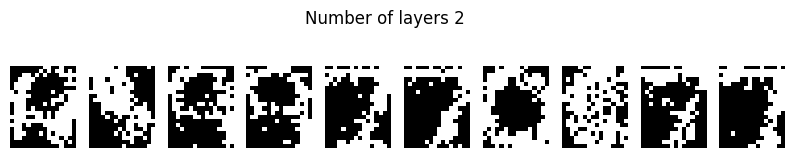

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 1, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        [0, 1, 1, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 1, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 

In [11]:
images = dbn.generate_images(10, x_shape=20, y_shape=16, nb_iterations=500, Plot=True)